# ICE5_Siyuan_Gu

## Clustering and k-Means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

`The "cluster center" is the arithmetic mean of all the points belonging to the cluster.`
`Each point is closer to its own cluster center than to other cluster centers.`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simulate some data on a 2-dimensional plane with `make_blobs`.

In [2]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


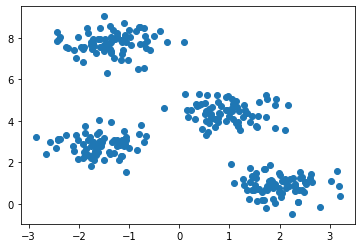

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);

Obviously, it is 4 clusters.

In [4]:
from sklearn.cluster import KMeans

Next,we need to
* 1.Initialize the model by telling KMeans() the number of k.
* 2.Feed the data to the model.
* 3.Call predict() and use the data to get the clustering result.

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

Then visualize the results with colored labels.

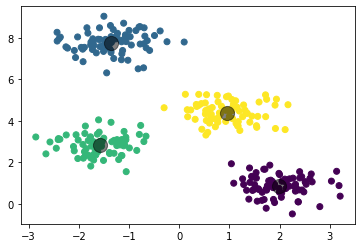

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); # plotting the centers onto scatter plot
                                                                        # c = color, s = dot size, and alpha = transparency

## Silhoutte Coefficient and Silhoutte Plot

From `sklearn.metrics`, we can call `silhouette_score`. This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use `silhouette_samples`.

In [7]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


Then install the `yellowbrick` package for obtaining the silhouette plot.

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

In [9]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

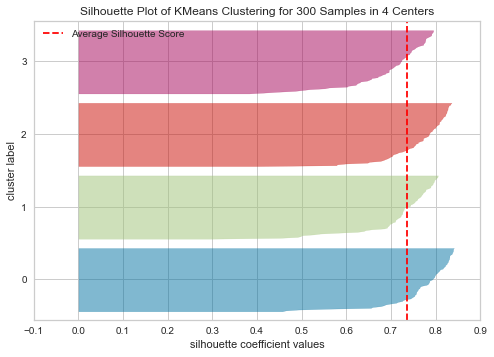

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
visualizer.fit(twoDData)
visualizer.show()

The same functionality above can be achieved with the associated quick method `silhouette_visualizer`.

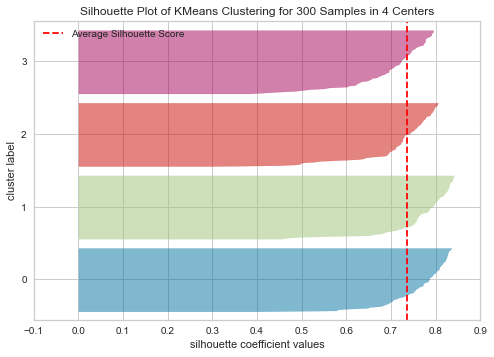

C:\Users\gusiy\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', model=None)

In [15]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

Due to the version of sklearn, it may not auto-fit by the estimator. I will not change the verison as there are other file influenced by the sklearn package.

## Clustering with k-Means: Self-Reported Motivation

In [16]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM')
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


Next we need to manipulate the data frame into a structure that can be analyzed by our clustering algorithm.
* The algorithm will treat each row as a value belonging to a person, so we need to remove the id variable. And we also need to filter out all the NAs because k-Means won't work if it only sees partial data.

In [17]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


Let's try 2 clusters first.

In [18]:
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

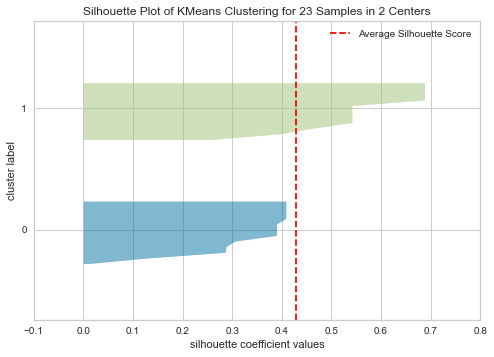

Silhouetter Score: 0.4278253443934091


In [19]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

Score is around 0.43, and the plot is not bad but we can try 3 and 4 clusters to see if there is an improvement.

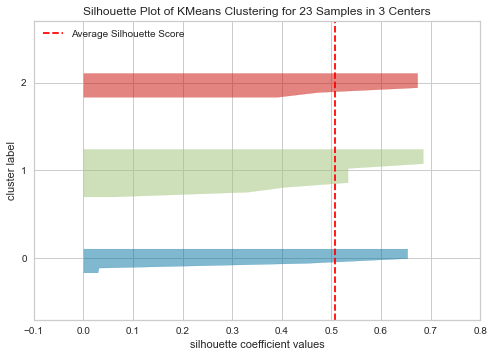

Silhouetter Score: 0.5078715772811808


In [20]:
motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

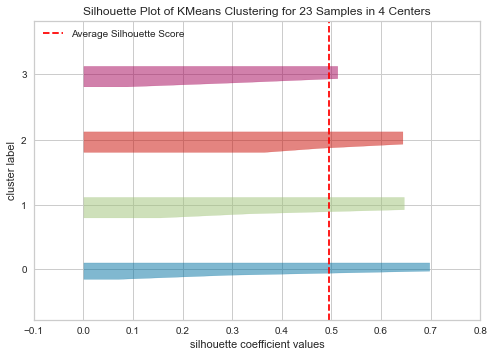

Silhouetter Score: 0.49488453159748896


In [21]:
motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

By comparing the scores from different numbers of clusters, we see that 3 clusters is the most reasonable method. So, we create a new df to include the result of 3 clusters above.

In [23]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,2
2,1,2.0,1,2.0,2.0,0
6,2,2.0,2,2.0,2.0,2
9,2,2.0,2,2.0,2.0,2
11,2,1.0,2,1.0,2.0,0
13,2,3.0,2,3.0,1.0,2
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,0
18,1,1.0,1,1.0,1.0,0
